In [65]:
import numpy as np
import pandas as pd
import wandb
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gmean


### ELSA base ---> Spread mSearch + Rands

In [132]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSA_base_fixed")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

989it [00:09, 96.61it/s] wandb: Network error (HTTPError), entering retry loop.
1094it [00:23, 15.39it/s]wandb: Network error (HTTPError), entering retry loop.
1739it [00:37, 99.81it/s] wandb: Network error (HTTPError), entering retry loop.
1806it [00:45, 39.27it/s]


In [133]:
df=df.dropna()

In [134]:
bt = df[df.algo == "bt"]
vicreg = df[df.algo == "vicreg"]

bt_1 = bt[bt.no_seeds == 1]
bt_2 = bt[bt.no_seeds == 2]
bt_5 = bt[bt.no_seeds == 5]
bt_10 = bt[bt.no_seeds == 10]
bt_50 = bt[bt.no_seeds == 50]

vicreg_1 = vicreg[vicreg.no_seeds == 1]
vicreg_2 = vicreg[vicreg.no_seeds== 2]
vicreg_5 = vicreg[vicreg.no_seeds== 5]
vicreg_10 = vicreg[vicreg.no_seeds == 10]
vicreg_50 = vicreg[vicreg.no_seeds == 50]

In [135]:
import numpy as np

def print_scores(seeds, algorithm, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Algorithm ---- > {algorithm}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")


def gm(a,b):
    return (a*b) ** 0.5
# # Seed 1
# print_scores(1, "Barlow Twin", np.median(bt_1["Final Labelling Efficiency"]), np.median(bt_1["Final Percentage Discovery"]))
print_scores(1, "VICReg", np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))

# # Seed 2
# print_scores(2, "Barlow Twin", np.median(bt_2["Final Labelling Efficiency"]), np.median(bt_2["Final Percentage Discovery"]))
print_scores(2, "VICReg", np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))

# # Seed 5
# print_scores(5, "Barlow Twin", np.median(bt_5["Final Labelling Efficiency"]), np.median(bt_5["Final Percentage Discovery"]))
print_scores(5, "VICReg", np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))

# # Seed 10
# print_scores(10, "Barlow Twin", np.median(bt_10["Final Labelling Efficiency"]), np.median(bt_10["Final Percentage Discovery"]))
print_scores(10, "VICReg", np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))

# # Seed 50
# print_scores(50, "Barlow Twin", np.median(bt_50["Final Labelling Efficiency"]), np.median(bt_50["Final Percentage Discovery"]))
print_scores(50, "VICReg", np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))

score_base = {
    1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
    2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
    5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
    10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
    50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
}


Seeds ---- > 1
Algorithm ---- > VICReg
Le 0.12040974101275607
Dr 0.8861538461538462
Composite 0.3266520398112375
Seeds ---- > 2
Algorithm ---- > VICReg
Le 0.12054613671363645
Dr 0.8819230769230769
Composite 0.3260558538067982
Seeds ---- > 5
Algorithm ---- > VICReg
Le 0.1159952280444159
Dr 0.8659392049883087
Composite 0.3169303007842877
Seeds ---- > 10
Algorithm ---- > VICReg
Le 0.11410128193472134
Dr 0.8713951675759938
Composite 0.31532095663330434
Seeds ---- > 50
Algorithm ---- > VICReg
Le 0.10588443879407068
Dr 0.8969230769230769
Composite 0.3081723489241874


### ELSA base ---> Spread Search + Rands +NO ACTIVE LEARNING

In [136]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSA_no_ac_fixed")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

398it [00:05, 73.22it/s] wandb: Network error (HTTPError), entering retry loop.
1145it [00:20, 138.40it/s]wandb: Network error (HTTPError), entering retry loop.
1646it [00:36, 99.32it/s] wandb: Network error (HTTPError), entering retry loop.
2287it [00:51, 51.97it/s] wandb: Network error (HTTPError), entering retry loop.
2500it [01:02, 39.93it/s]


In [137]:
df=df.dropna()

In [138]:
bt = df[df.algo == "bt"]
vicreg = df[df.algo == "vicreg"]

bt_1 = bt[bt.no_seeds == 1]
bt_2 = bt[bt.no_seeds == 2]
bt_5 = bt[bt.no_seeds == 5]
bt_10 = bt[bt.no_seeds == 10]
bt_50 = bt[bt.no_seeds == 50]

vicreg_1 = vicreg[vicreg.no_seeds == 1]
vicreg_2 = vicreg[vicreg.no_seeds== 2]
vicreg_5 = vicreg[vicreg.no_seeds== 5]
vicreg_10 = vicreg[vicreg.no_seeds == 10]
vicreg_50 = vicreg[vicreg.no_seeds == 50]

In [139]:
import numpy as np

def print_scores(seeds, algorithm, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Algorithm ---- > {algorithm}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")

# # Seed 1
# print_scores(1, "Barlow Twin", np.median(bt_1["Final Labelling Efficiency"]), np.median(bt_1["Final Percentage Discovery"]))
print_scores(1, "VICReg", np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))

# # Seed 2
# print_scores(2, "Barlow Twin", np.median(bt_2["Final Labelling Efficiency"]), np.median(bt_2["Final Percentage Discovery"]))
print_scores(2, "VICReg", np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))

# # Seed 5
# print_scores(5, "Barlow Twin", np.median(bt_5["Final Labelling Efficiency"]), np.median(bt_5["Final Percentage Discovery"]))
print_scores(5, "VICReg", np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))

# # Seed 10
# print_scores(10, "Barlow Twin", np.median(bt_10["Final Labelling Efficiency"]), np.median(bt_10["Final Percentage Discovery"]))
print_scores(10, "VICReg", np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))

# # Seed 50
# print_scores(50, "Barlow Twin", np.median(bt_50["Final Labelling Efficiency"]), np.median(bt_50["Final Percentage Discovery"]))
print_scores(50, "VICReg", np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))

score_elsa_noac = {
    1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
    2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
    5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
    10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
    50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
}

Seeds ---- > 1
Algorithm ---- > VICReg
Le 0.034083442838370566
Dr 0.8538461538461538
Composite 0.17059313168289614
Seeds ---- > 2
Algorithm ---- > VICReg
Le 0.03520665545377573
Dr 0.8815384615384616
Composite 0.1761704313573539
Seeds ---- > 5
Algorithm ---- > VICReg
Le 0.0338107639692513
Dr 0.8842307692307693
Composite 0.1729060954183254
Seeds ---- > 10
Algorithm ---- > VICReg
Le 0.03395283176186234
Dr 0.8915384615384616
Composite 0.17398349172793656
Seeds ---- > 50
Algorithm ---- > VICReg
Le 0.02829547660648418
Dr 0.9353846153846154
Composite 0.16268728746488026


### ELSA 2 COMPONENT

In [140]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSAC_fixed")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep2':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

344it [00:03, 132.49it/s]wandb: Network error (HTTPError), entering retry loop.
1090it [00:20, 41.90it/s]wandb: Network error (HTTPError), entering retry loop.
1250it [00:30, 41.35it/s]


In [141]:
df=df.dropna()

In [142]:
vicreg = df[df.algo == "vicreg"]

vicreg_1 = vicreg[vicreg.no_seeds == 1]
vicreg_2 = vicreg[vicreg.no_seeds== 2]
vicreg_5 = vicreg[vicreg.no_seeds== 5]
vicreg_10 = vicreg[vicreg.no_seeds == 10]
vicreg_50 = vicreg[vicreg.no_seeds == 50]

In [143]:
import numpy as np

def print_scores(seeds, algorithm, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Algorithm ---- > {algorithm}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")

print_scores(1, "VICReg", np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))
print_scores(2, "VICReg", np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))
print_scores(5, "VICReg", np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))
print_scores(10, "VICReg", np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))
print_scores(50, "VICReg", np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))

score_2c = {
    1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
    2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
    5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
    10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
    50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
}

Seeds ---- > 1
Algorithm ---- > VICReg
Le 0.09934634294288144
Dr 0.8803846153846153
Composite 0.2957414274693973
Seeds ---- > 2
Algorithm ---- > VICReg
Le 0.0967525625311022
Dr 0.868225041571719
Composite 0.28983270627335445
Seeds ---- > 5
Algorithm ---- > VICReg
Le 0.0913350644770904
Dr 0.8680769230769231
Composite 0.28157745247143817
Seeds ---- > 10
Algorithm ---- > VICReg
Le 0.0889448772254076
Dr 0.874179507164698
Composite 0.27884366397272037
Seeds ---- > 50
Algorithm ---- > VICReg
Le 0.0718354066708683
Dr 0.91
Composite 0.255676006051585


### ELSA 3 Component

In [144]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSA2C")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep2':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

193it [00:03, 122.11it/s]wandb: Network error (HTTPError), entering retry loop.
848it [00:18, 50.09it/s] wandb: Network error (HTTPError), entering retry loop.
1396it [00:33, 107.59it/s]wandb: Network error (HTTPError), entering retry loop.
1890it [00:47, 109.22it/s]wandb: Network error (HTTPError), entering retry loop.
2389it [01:01, 107.71it/s]wandb: Network error (HTTPError), entering retry loop.
3039it [01:18, 117.85it/s]wandb: Network error (HTTPError), entering retry loop.
3636it [01:33, 116.71it/s]wandb: Network error (HTTPError), entering retry loop.
4045it [01:48, 28.90it/s] wandb: Network error (HTTPError), entering retry loop.
4497it [02:02, 99.26it/s] wandb: Network error (HTTPError), entering retry loop.
5136it [02:18, 115.36it/s]wandb: Network error (HTTPError), entering retry loop.
5598it [02:35, 45.37it/s] wandb: Network error (HTTPError), entering retry loop.
6040it [02:49, 98.05it/s] wandb: Network error (HTTPError), entering retry loop.
6545it [03:03, 101.65it/s]wand

In [145]:
df = df.dropna()

In [146]:

zeta = list(set(list(df["zeta"])))
zeta.sort()

In [147]:
def print_scores(seeds, zeta, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Zeta ---- > {zeta}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")



In [148]:
zeta

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [149]:
print("ALL STATS FOR VICREG")
score_3c = {}
for z in zeta:
    print("==============================================")
    print("==============================================")
    print("==============================================")
    vicreg = df[df.algo == "vicreg"]
    vicreg = vicreg[vicreg.zeta == z]
    vicreg_1 = vicreg[vicreg.no_seeds == 1]
    vicreg_2 = vicreg[vicreg.no_seeds== 2]
    vicreg_5 = vicreg[vicreg.no_seeds== 5]
    vicreg_10 = vicreg[vicreg.no_seeds == 10]
    vicreg_50 = vicreg[vicreg.no_seeds == 50]
    
    print_scores(1, z, np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))
    print_scores(2, z, np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))
    print_scores(5, z, np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))
    print_scores(10, z, np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))
    print_scores(50, z, np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))
    print("==============================================")
    print("==============================================")
    print("==============================================")
    
    score_3c[z] = {
            1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
            2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
            5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
            10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
            50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
            }

ALL STATS FOR VICREG
Seeds ---- > 1
Zeta ---- > 0.1
Le 0.03764642761334168
Dr 0.8484615384615385
Composite 0.17872197931535122
Seeds ---- > 2
Zeta ---- > 0.1
Le 0.03682462078475617
Dr 0.8630769230769231
Composite 0.17827641571554514
Seeds ---- > 5
Zeta ---- > 0.1
Le 0.039253712813791836
Dr 0.8621697943521793
Composite 0.18396566392733837
Seeds ---- > 10
Zeta ---- > 0.1
Le 0.0379929349001514
Dr 0.8784615384615385
Composite 0.1826891678317466
Seeds ---- > 50
Zeta ---- > 0.1
Le 0.031994931496000634
Dr 0.9323076923076924
Composite 0.17271109040411695
Seeds ---- > 1
Zeta ---- > 0.2
Le 0.05018435067595248
Dr 0.8863090472377902
Composite 0.21090008068715999
Seeds ---- > 2
Zeta ---- > 0.2
Le 0.05134827363853007
Dr 0.894865738744842
Composite 0.2143590698403394
Seeds ---- > 5
Zeta ---- > 0.2
Le 0.04850655611993106
Dr 0.8680769230769231
Composite 0.20520093076213822
Seeds ---- > 10
Zeta ---- > 0.2
Le 0.0483440590174227
Dr 0.8815384615384615
Composite 0.206439209964443
Seeds ---- > 50
Zeta ---- >

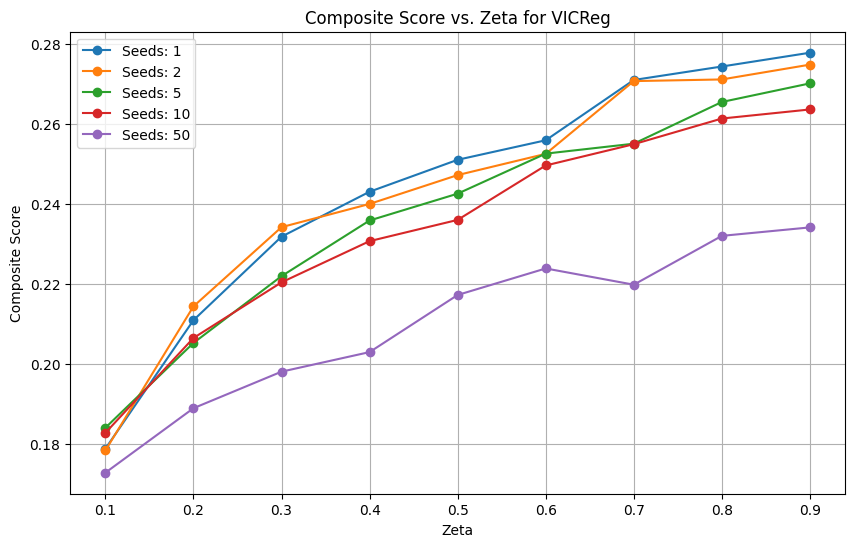

In [150]:
# Initialize lists to store zeta values and corresponding composite scores
zeta_values = []
composite_scores_by_seeds = {1: [], 2: [], 5: [], 10: [], 50: []}

# Loop through each zeta value
for z in zeta:
    zeta_values.append(z)
    
    vicreg = df[(df.algo == "vicreg") & (df.zeta == z)]
    
    # Calculate composite scores for different seeds
    for seeds in [1, 2, 5, 10, 50]:
        vicreg_seeds = vicreg[vicreg.no_seeds == seeds]
        le = np.median(vicreg_seeds["Final Labelling Efficiency"])
        dr = np.median(vicreg_seeds["Final Percentage Discovery"])
        composite_score = (le * dr) ** 0.5
        composite_scores_by_seeds[seeds].append(composite_score)

# Plot the results
plt.figure(figsize=(10, 6))
for seeds, scores in composite_scores_by_seeds.items():
    plt.plot(zeta_values, scores, label=f'Seeds: {seeds}', marker='o')

# Customize the plot
plt.title('Composite Score vs. Zeta for VICReg')
plt.xlabel('Zeta')
plt.ylabel('Composite Score')
plt.legend()
plt.grid(True)
plt.show()

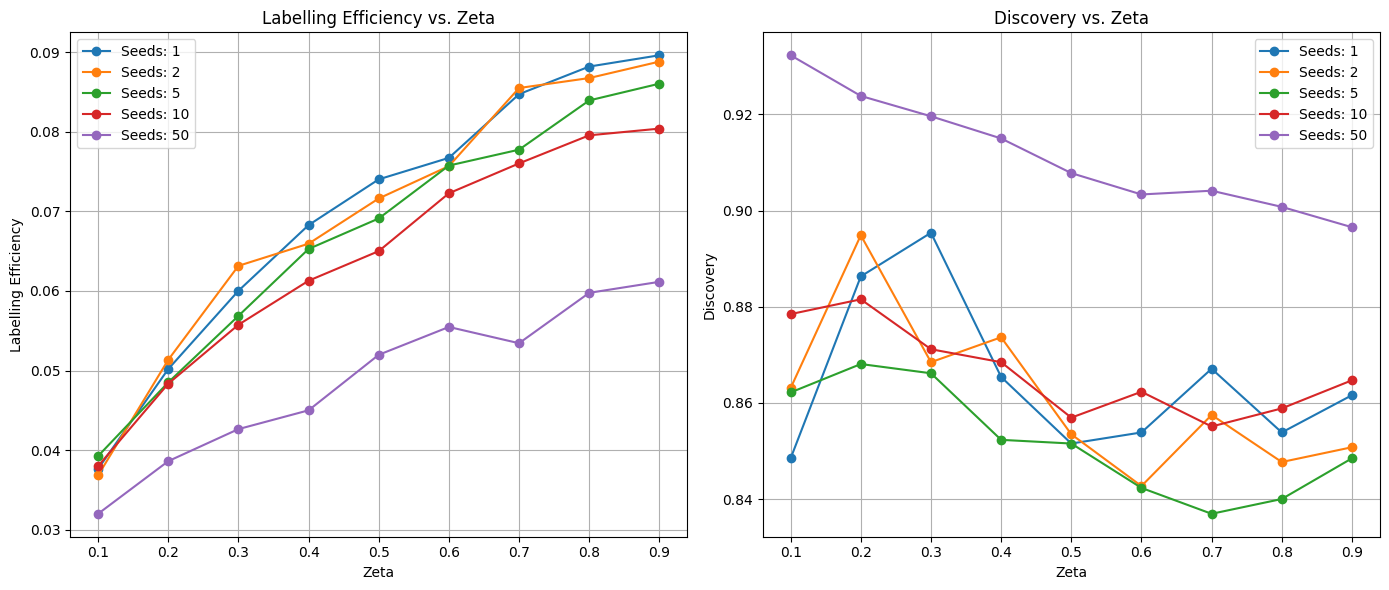

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store zeta values and corresponding scores for labelling efficiency and discovery
zeta_values = []
labelling_efficiency_by_seeds = {1: [], 2: [], 5: [], 10: [], 50: []}
discovery_by_seeds = {1: [], 2: [], 5: [], 10: [], 50: []}

# Loop through each zeta value
for z in zeta:
    zeta_values.append(z)
    
    vicreg = df[(df.algo == "vicreg") & (df.zeta == z)]
    
    # Collect labelling efficiency and discovery scores for different seeds
    for seeds in [1, 2, 5, 10, 50]:
        vicreg_seeds = vicreg[vicreg.no_seeds == seeds]
        le = np.median(vicreg_seeds["Final Labelling Efficiency"])
        dr = np.median(vicreg_seeds["Final Percentage Discovery"])
        
        labelling_efficiency_by_seeds[seeds].append(le)
        discovery_by_seeds[seeds].append(dr)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Labelling Efficiency
for seeds, le_scores in labelling_efficiency_by_seeds.items():
    axes[0].plot(zeta_values, le_scores, label=f'Seeds: {seeds}', marker='o')

axes[0].set_title('Labelling Efficiency vs. Zeta')
axes[0].set_xlabel('Zeta')
axes[0].set_ylabel('Labelling Efficiency')
axes[0].legend()
axes[0].grid(True)

# Plot for Discovery
for seeds, dr_scores in discovery_by_seeds.items():
    axes[1].plot(zeta_values, dr_scores, label=f'Seeds: {seeds}', marker='o')

axes[1].set_title('Discovery vs. Zeta')
axes[1].set_xlabel('Zeta')
axes[1].set_ylabel('Discovery')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


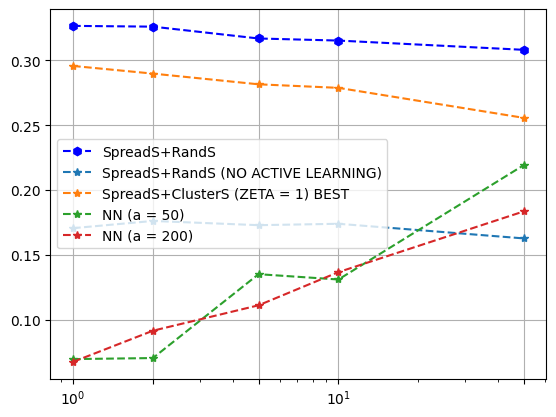

In [152]:
### NN

# GM scores for VICReg (a = 50)
gm_scores_a_50 = {
    1: 0.0696,
    2: 0.0704,
    5: 0.1351,
    10: 0.1310,
    50: 0.2193
}

# GM scores for VICReg (a = 200)
gm_scores_a_200 = {
    1: 0.06745,
    2: 0.09149,
    5: 0.11109,
    10: 0.13668,
    50: 0.18358
}

######

# Plotting ELSA BASE
seeds = list(score_base.keys())
composite_scores = list(score_base.values())

# plt.figure(figsize=(10, 6))
plt.xscale("log")
plt.xticks([1,2,5,10,50])


plt.plot(seeds, composite_scores, marker='h', linestyle='--', color='b',label="SpreadS+RandS")

# Plotting ELSA No Ac
seeds = list(score_elsa_noac.keys())
composite_scores = list(score_elsa_noac.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="SpreadS+RandS (NO ACTIVE LEARNING)")

# Plotting ELSA 2 Component
seeds = list(score_2c.keys())
composite_scores = list(score_2c.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="SpreadS+ClusterS (ZETA = 1) BEST")
# Plotting NN
seeds = list(gm_scores_a_50.keys())
composite_scores = list(gm_scores_a_50.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="NN (a = 50)")
# Plotting NN_Large
# Plotting NN
seeds = list(gm_scores_a_200.keys())
composite_scores = list(gm_scores_a_200.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="NN (a = 200)")
plt.legend()
plt.grid()


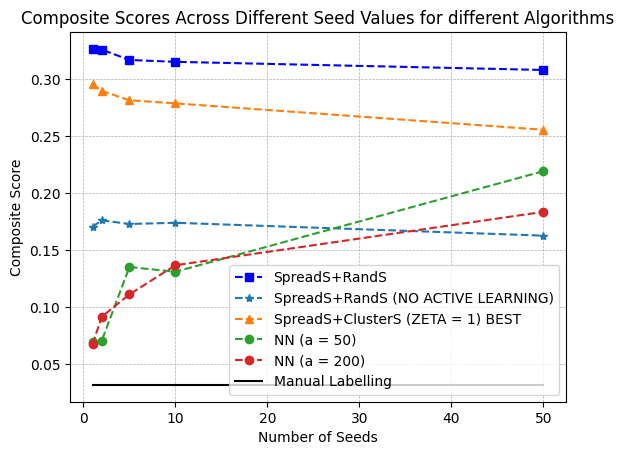

In [174]:
import matplotlib.pyplot as plt

# GM scores for VICReg (a = 50)
gm_scores_a_50 = {
    1: 0.0696,
    2: 0.0704,
    5: 0.1351,
    10: 0.1310,
    50: 0.2193
}

# GM scores for VICReg (a = 200)
gm_scores_a_200 = {
    1: 0.06745,
    2: 0.09149,
    5: 0.11109,
    10: 0.13668,
    50: 0.18358
}

# Start plotting
# plt.figure(figsize=(10, 6))

# Set logarithmic scale
# plt.yscale("log")

# Plotting ELSA BASE
plt.plot(list(score_base.keys()), list(score_base.values()), marker='s', linestyle='--', color='b', label="SpreadS+RandS")

# Plotting ELSA No Ac
plt.plot(list(score_elsa_noac.keys()), list(score_elsa_noac.values()), marker='*', linestyle='--', label="SpreadS+RandS (NO ACTIVE LEARNING)")

# Plotting ELSA 2 Component
plt.plot(list(score_2c.keys()), list(score_2c.values()), marker='^', linestyle='--', label="SpreadS+ClusterS (ZETA = 1) BEST")

# Plotting NN (a = 50)
plt.plot(list(gm_scores_a_50.keys()), list(gm_scores_a_50.values()), marker='o', linestyle='--', label="NN (a = 50)")

# Plotting NN (a = 200)
plt.plot(list(gm_scores_a_200.keys()), list(gm_scores_a_200.values()), marker='o', linestyle='--', label="NN (a = 200)")

### Manual Labelling ...
plt.plot([1,2,5,10,50],[0.0316,0.0316,0.0316,0.0316,0.0316],c="black", label="Manual Labelling")

# Customize the plot
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Add grid for both major and minor ticks
plt.xlabel("Number of Seeds")
plt.ylabel("Composite Score")
plt.title("Composite Scores Across Different Seed Values for different Algorithms")

# Show plot
# plt.show()
plt.savefig("Plot2.pdf")
# Explicitly set the ticks for the x-axis